In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=False)

img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [4]:
features.shape

(1, 7, 7, 512)

In [5]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

In [7]:
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

In [9]:
block4_pool_features.shape

(1, 14, 14, 512)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

from vis.utils import utils
from vis.utils.vggnet import VGG16
from vis.visualization import visualize_saliency, visualize_cam, visualize_activation

Using TensorFlow backend.


In [81]:
# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)
print('Model loaded.')

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

# Images corresponding to tiger, penguin, dumbbell, speedboat, spider
image_paths = [
    "http://www.tigerfdn.com/wp-content/uploads/2016/05/How-Much-Does-A-Tiger-Weigh.jpg",
    "http://www.slate.com/content/dam/slate/articles/health_and_science/wild_things/2013/10/131025_WILD_AdeliePenguin.jpg.CROP.promo-mediumlarge.jpg",
    "https://www.kshs.org/cool2/graphics/dumbbell1lg.jpg",
    "http://tampaspeedboatadventures.com/wp-content/uploads/2010/10/DSC07011.jpg",
    "http://ichef-1.bbci.co.uk/news/660/cpsprodpb/1C24/production/_85540270_85540265.jpg"
]

Model loaded.


In [82]:
images = [
    "./trump.jpg",
    "./bug.png",
    "./cat.jpg"
]

In [4]:
heatmaps = []
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(224, 224))
    x = np.expand_dims(img_to_array(seed_img), axis=0)
    x = preprocess_input(x)
    pred_class = np.argmax(model.predict(x))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
#     heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img, alpha=0)
    heatmap = visualize_activation(model, layer_idx, [pred_class], seed_img)
    heatmaps.append(heatmap)

Working on filters: [292]
Working on filters: [145]
Working on filters: [543]
Working on filters: [814]
Working on filters: [815]


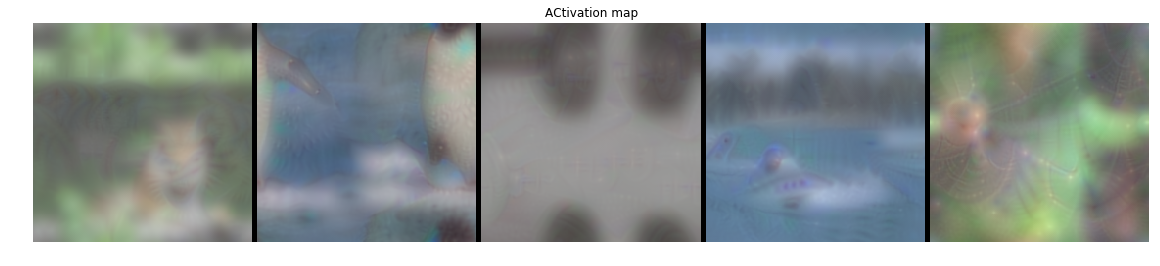

In [6]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(utils.stitch_images(heatmaps))
plt.title('ACtivation map')
plt.show()

In [21]:
heatmaps_saliency = []
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(224, 224))
    x = np.expand_dims(img_to_array(seed_img), axis=0)
    x = preprocess_input(x)
    pred_class = np.argmax(model.predict(x))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
    heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img, alpha=0)
#     heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img)
    heatmaps_saliency.append(heatmap)

Working on filters: [292]
Working on filters: [145]
Working on filters: [543]
Working on filters: [814]
Working on filters: [815]


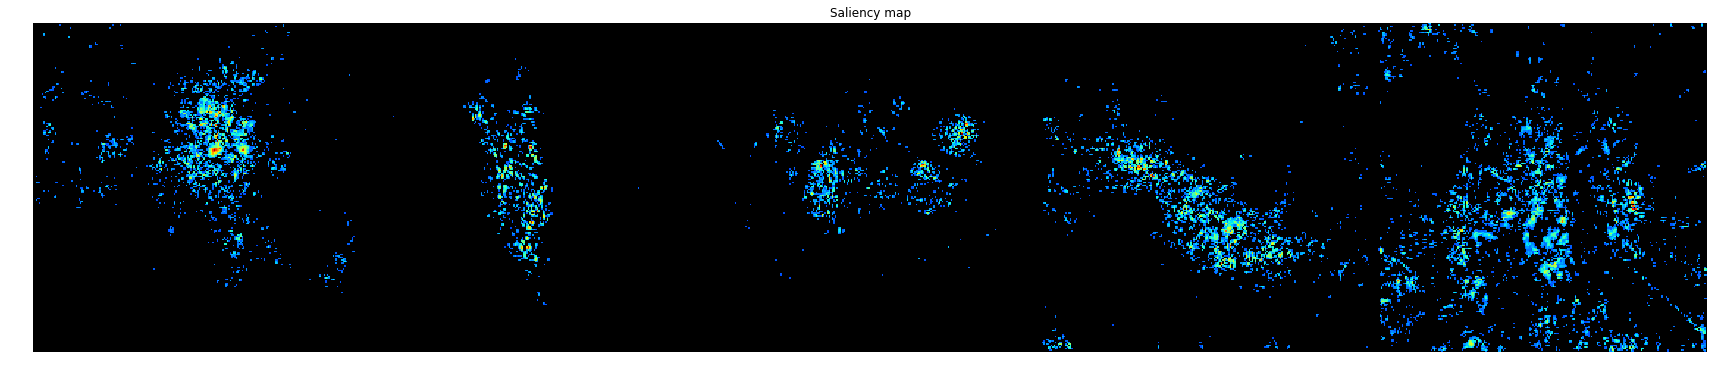

In [23]:
plt.figure(figsize=(30, 30))
plt.axis('off')
plt.imshow(utils.stitch_images(heatmaps_saliency))
plt.title('Saliency map')
plt.show()

In [9]:
heatmaps_cam = []
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(224, 224))
    x = np.expand_dims(img_to_array(seed_img), axis=0)
    x = preprocess_input(x)
    pred_class = np.argmax(model.predict(x))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
#     heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img, alpha=0)
    heatmap = visualize_cam(model, layer_idx, [pred_class], seed_img)
    heatmaps_cam.append(heatmap)

Working on filters: [292]
Working on filters: [145]
Working on filters: [543]
Working on filters: [814]
Working on filters: [815]


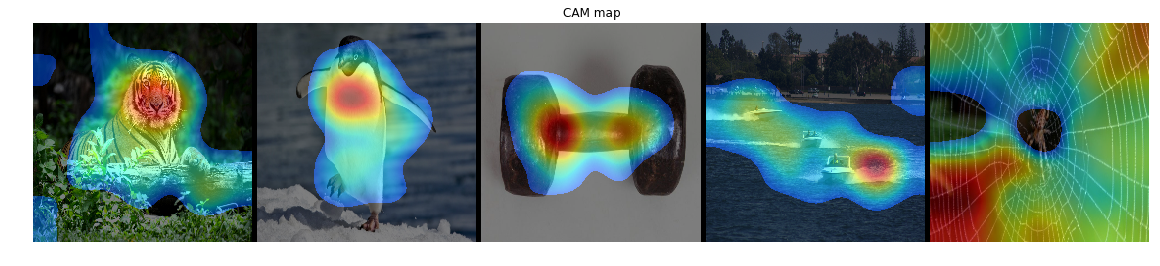

In [10]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(utils.stitch_images(heatmaps_cam))
plt.title('CAM map')
plt.show()

In [20]:
layer_output = model.layers[layer_idx].output
print(layer_output)

from keras import backend as K
print(K.mean(layer_output[: layer_idx]))

Tensor("predictions/BiasAdd:0", shape=(?, 1000), dtype=float32)
Tensor("Mean_30:0", shape=(), dtype=float32)


In [83]:
heatmaps_saliency2 = []
for path in images:
    seed_img = utils.load_img(path, target_size=(224, 224))
    x = np.expand_dims(img_to_array(seed_img), axis=0)
    x = preprocess_input(x)
    pred_class = np.argmax(model.predict(x))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
    heatmap = visualize_activation(model, layer_idx, [pred_class], seed_img)
#     heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img)
    heatmaps_saliency2.append(heatmap)

Working on filters: [834]
Working on filters: [303]
Working on filters: [281]


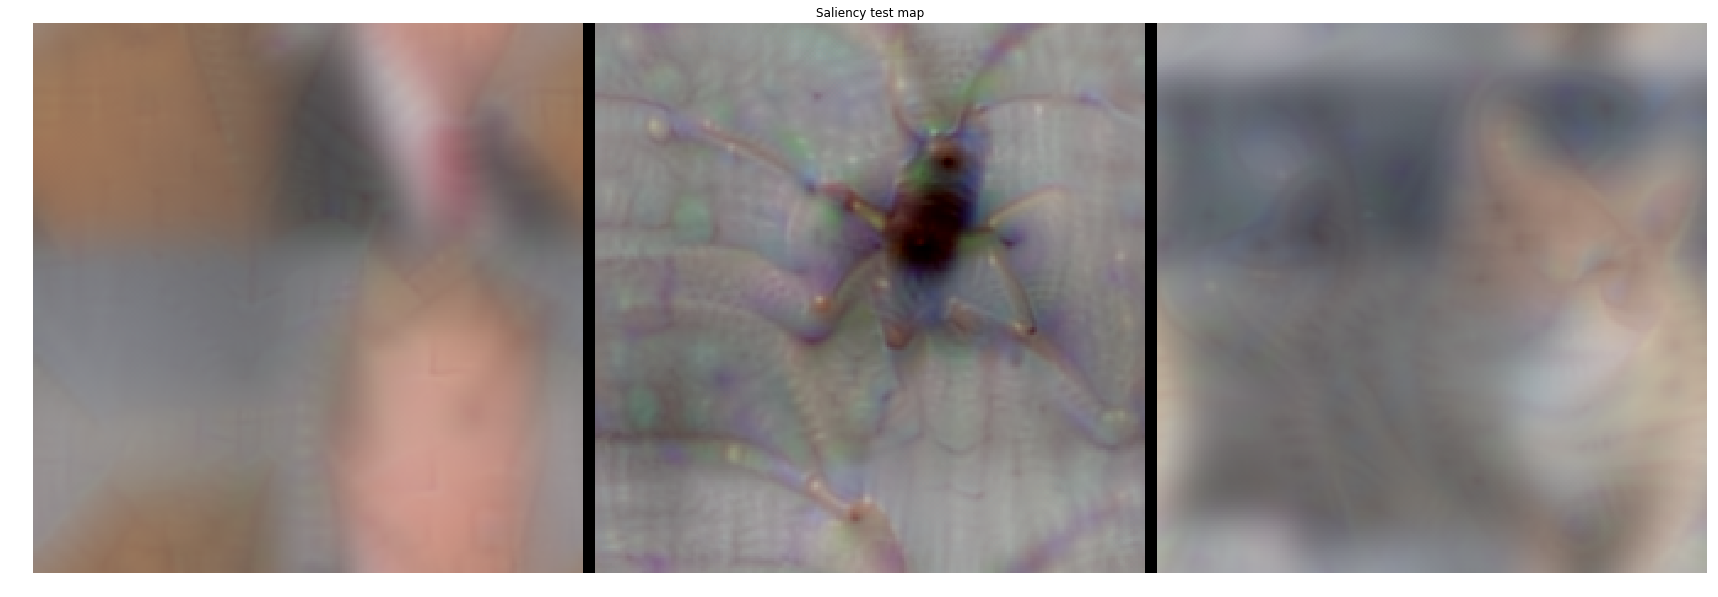

In [84]:
plt.figure(figsize=(30, 30))
plt.axis('off')
plt.imshow(utils.stitch_images(heatmaps_saliency2))
plt.title('Saliency test map')
plt.show()

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________